In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#csv com as informações de paídes com algum grau de quarentena
df = pd.read_csv('stay-at-home-covid.csv')
df.head(1)

,Entity,Code,Date,Stay at home requirements (OxBSG)
0,Afghanistan,AFG,"Jan 1, 2020",0


In [9]:
datas = df['Date'] #datas para o eixo x
datas = datas.drop_duplicates() #remove valores repetidos

cod = df['Code'] #código do país
cod = cod.drop_duplicates() #remove valores repetidos

In [10]:
total_paises_isolamento = []

for data in datas:
    #todos os dados do df onde Date == data
    paises_date = df.query('Date == ' + '\''+data+'\'') 
    #lista com a quantidade de valores em cada 'Stay at home requirements (OxBSG)'
    valores_stay = paises_date.groupby(by='Stay at home requirements (OxBSG)').size()
    #adiciona o total de países em isolamento para a data atual na lista
    total_paises_isolamento.append(sum(valores_stay[1:4]))

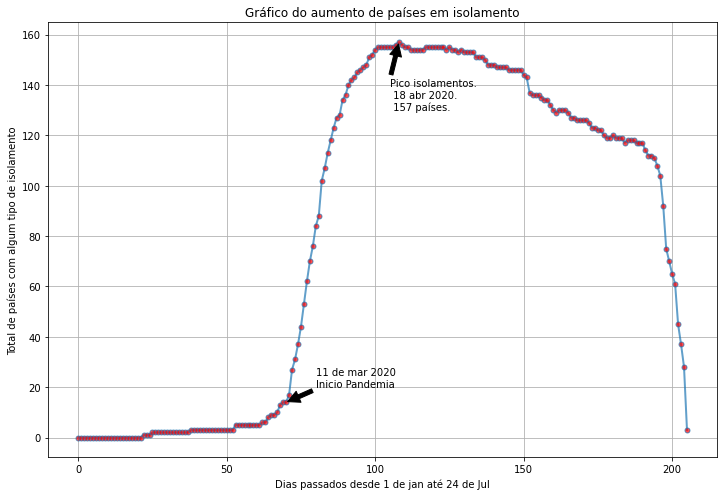

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel('Dias passados desde 1 de jan até 24 de Jul')
ax.set_ylabel('Total de países com algum tipo de isolamento')
ax.set_title('Gráfico do aumento de países em isolamento')
ax.annotate('Pico isolamentos.\n 18 abr 2020.\n 157 países. ', xy=(108, 157), xytext=(105, 130),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('11 de mar 2020\nInicio Pandemia', xy=(70, 14), xytext=(80, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(total_paises_isolamento,'-o', ms=5, lw=2, alpha=0.7, mfc='red')
ax.grid()
